# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [11]:
tips = sns.load_dataset("tips").dropna().copy()
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct']  = tips['tip'] / tips['total_bill']


In [12]:
X = tips[['net_bill']]
y = tips['tip_pct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_df = X_train.copy()
train_df['tip_pct'] = y_train.values

test_df = X_test.copy()
test_df['tip_pct'] = y_test.values

# Ajustar modelo base
m1 = smf.ols('tip_pct ~ net_bill', data=train_df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     41.13
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.07e-09
Time:                        20:45:15   Log-Likelihood:                 279.59
No. Observations:                 195   AIC:                            -555.2
Df Residuals:                     193   BIC:                            -548.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2192      0.010     22.079      0.0

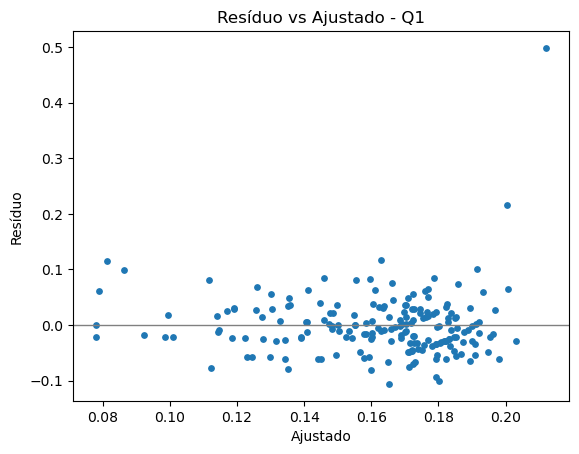

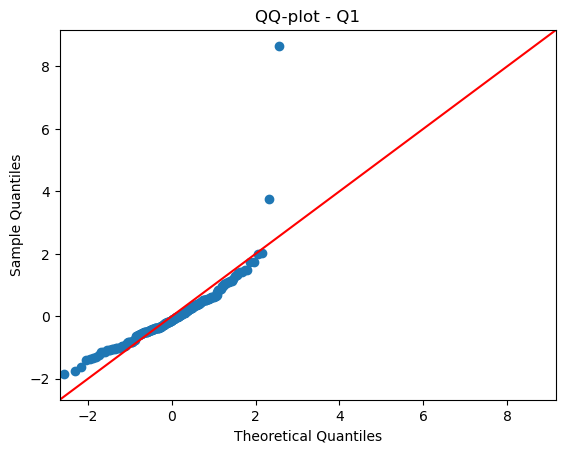

In [13]:
fitted1 = m1.fittedvalues
resid1  = m1.resid

plt.scatter(fitted1, resid1, s=15)
plt.axhline(0, color='gray', lw=1)
plt.xlabel('Ajustado')
plt.ylabel('Resíduo')
plt.title('Resíduo vs Ajustado - Q1')
plt.show()

sm.qqplot(resid1, line='45', fit=True)
plt.title('QQ-plot - Q1')
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     74.59
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.17e-15
Time:                        20:45:16   Log-Likelihood:                 292.62
No. Observations:                 195   AIC:                            -581.2
Df Residuals:                     193   BIC:                            -574.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3619      0.024     15.375   

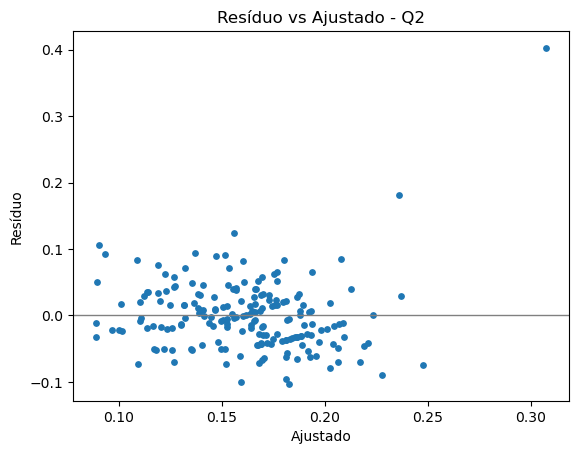

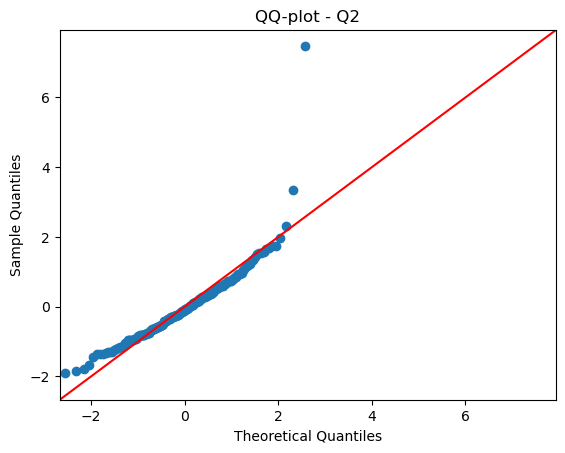

In [14]:
train_df['log_net_bill'] = np.log(train_df['net_bill'])
test_df['log_net_bill']  = np.log(test_df['net_bill'])

m2 = smf.ols('tip_pct ~ log_net_bill', data=train_df).fit()
print(m2.summary())

fitted2 = m2.fittedvalues
resid2  = m2.resid

plt.scatter(fitted2, resid2, s=15)
plt.axhline(0, color='gray', lw=1)
plt.xlabel('Ajustado')
plt.ylabel('Resíduo')
plt.title('Resíduo vs Ajustado - Q2')
plt.show()

sm.qqplot(resid2, line='45', fit=True)
plt.title('QQ-plot - Q2')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     28.10
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.98e-11
Time:                        20:45:16   Log-Likelihood:                 285.79
No. Observations:                 195   AIC:                            -565.6
Df Residuals:                     192   BIC:                            -555.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2848      0.021     13.667      0.0

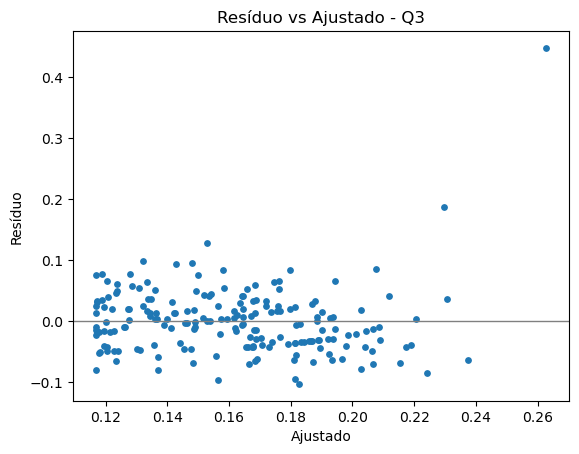

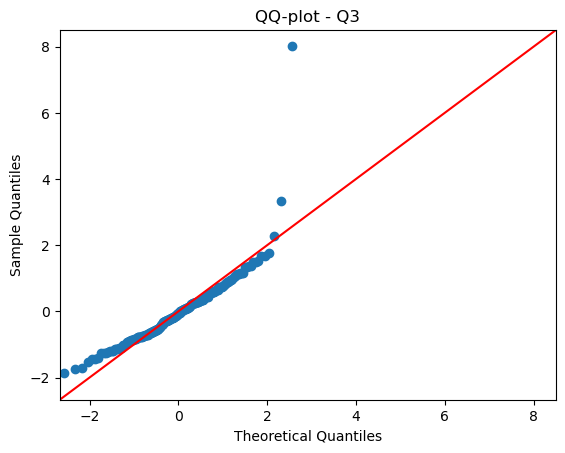

In [15]:
train_df['net_bill_2'] = train_df['net_bill'] ** 2
test_df['net_bill_2']  = test_df['net_bill'] ** 2

m3 = smf.ols('tip_pct ~ net_bill + net_bill_2', data=train_df).fit()
print(m3.summary())

fitted3 = m3.fittedvalues
resid3  = m3.resid

plt.scatter(fitted3, resid3, s=15)
plt.axhline(0, color='gray', lw=1)
plt.xlabel('Ajustado')
plt.ylabel('Resíduo')
plt.title('Resíduo vs Ajustado - Q3')
plt.show()

sm.qqplot(resid3, line='45', fit=True)
plt.title('QQ-plot - Q3')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     58.32
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.01e-12
Time:                        20:45:16   Log-Likelihood:                -51.295
No. Observations:                 195   AIC:                             106.6
Df Residuals:                     193   BIC:                             113.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5115      0.054    -27.896      0.0

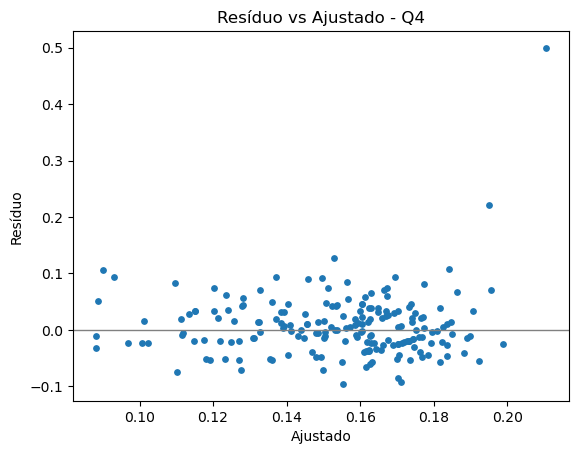

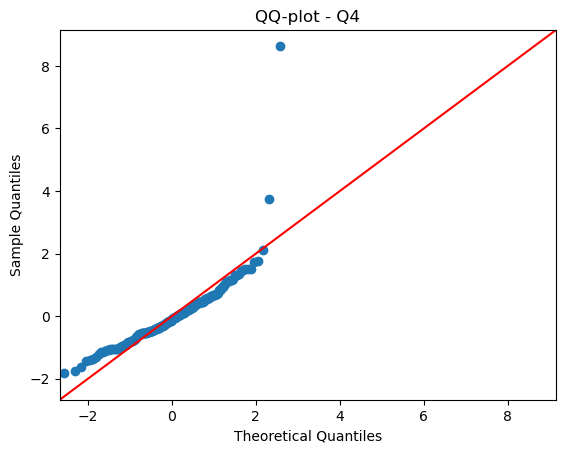

In [16]:
train_df['log_tip_pct'] = np.log(train_df['tip_pct'])

m4 = smf.ols('log_tip_pct ~ net_bill', data=train_df).fit()
print(m4.summary())

train_df['pred4'] = np.exp(m4.fittedvalues)

resid4 = train_df['tip_pct'] - train_df['pred4']

plt.scatter(train_df['pred4'], resid4, s=15)
plt.axhline(0, color='gray', lw=1)
plt.xlabel('Ajustado')
plt.ylabel('Resíduo')
plt.title('Resíduo vs Ajustado - Q4')
plt.show()

sm.qqplot(resid4, line='45', fit=True)
plt.title('QQ-plot - Q4')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     69.27
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.54e-14
Time:                        20:45:17   Log-Likelihood:                -47.136
No. Observations:                 195   AIC:                             98.27
Df Residuals:                     193   BIC:                             104.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7840      0.134     -5.832   

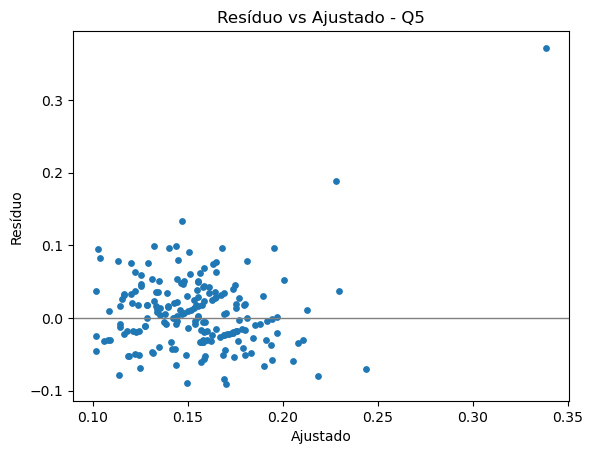

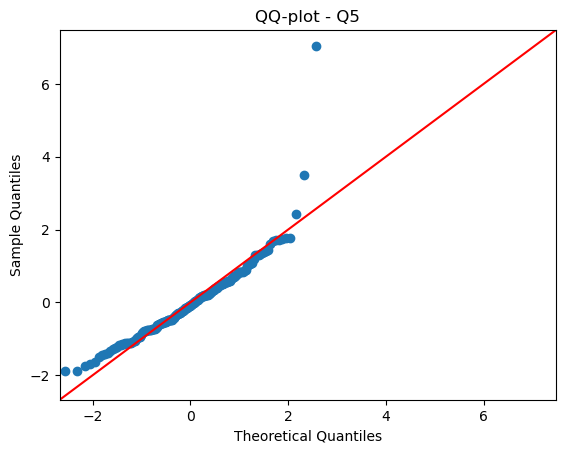

In [17]:
m5 = smf.ols('log_tip_pct ~ log_net_bill', data=train_df).fit()
print(m5.summary())


train_df['pred5'] = np.exp(m5.fittedvalues)


resid5 = train_df['tip_pct'] - train_df['pred5']

plt.scatter(train_df['pred5'], resid5, s=15)
plt.axhline(0, color='gray', lw=1)
plt.xlabel('Ajustado')
plt.ylabel('Resíduo')
plt.title('Resíduo vs Ajustado - Q5')
plt.show()

sm.qqplot(resid5, line='45', fit=True)
plt.title('QQ-plot - Q5')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

Pelo o que entendi das aulas, o modelo que tem um melhor desempenho seria o 5. Apesar de o R² não ser o mais alto, os resíduos desse modelo ficaram mais bem distribuídos, sem padrões evidentes, e próximos da normalidade.